In [1]:
''' The project is about predicting the price of second hand cars. 
problem-Lack of knowlege about the current price of a used car in market often make it difficult for a person to buy or sell a car,
solution- Many application and websites have made it easy for people to sell or buy cars, this model helps in finding the best market 
price of a car using machine learning algorithm with features like Year, Kilometers_Driven, new price and many more
Who can use it- people who want to check prices of a second hand car based on some required feature details.'''

' The project is about predicting the price of second hand cars. \nproblem-Lack of knowlege about the current price of a used car in market often make it difficult for a person to buy or sell a car,\nsolution- Many application and websites have made it easy for people to sell or buy cars, this model helps in finding the best market \nprice of a car using machine learning algorithm with features like Year, Kilometers_Driven, new price and many more\nWho can use it- people who want to check prices of a second hand car based on some required feature details.'

In [2]:
'''importing required libraries'''

'importing required libraries'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
'''importing the dataset
Dataset downloaded from kaggle, link- https://www.kaggle.com/c/1056lab-used-cars-price-prediction/data
Features of the dataset are as follows-
NUMERICAL FEATURES:
year- In which year the car model was launched.
Kilometers_Driven- No. of kilometers the car has been driven till date.
Fuel_Type- type of fuel the car uses.
Engine- cc of engine installed in the car.
Power- power the car gives.
Seats- the no. of seats. 
New_Price- showroom price of the same model currently.
CATEGORICAL FEATURES:
Transmission- car is automatic or manually driven. 
Owner_Type- Was sold how many times?
Mileage- mileage of the car currently.'''

'importing the dataset\ngot this dataset from kaggle, link- https://www.kaggle.com/c/1056lab-used-cars-price-prediction/data\nFeatures of the dataset are as follows-\nNUMERICAL FEATURES:\nyear- In which year the car model was launched.\nKilometers_Driven- No. of kilometers the car has been driven till date.\nFuel_Type- type of fuel the car uses.\nEngine- cc of engine installed in the car.\nPower- power the car gives.\nSeats- the no. of seats. \nNew_Price- showroom price of the same model currently.\nCATEGORICAL FEATURES:\nTransmission- car is automatic or manually driven. \nOwner_Type- Was sold how many times?\nMileage- mileage of the car currently.'

In [5]:
car_df = pd.read_csv("C:\data\car_data.csv")
car_df.shape

(6019, 13)

In [6]:
'''Data preprocessing
Features Engineering:
Filling the missing values which covers less than 5% of that feature
Encoding categorical data
Data cleaning'''

'Data preprocessing\nFeatures Engineering:\nFilling the missing values which covers less than 5% of that feature\nEncoding categorical data'

In [7]:
car_df= car_df.drop(['Name', 'Unnamed: 1'], axis=1)
car_df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [8]:
print(car_df.dtypes)

Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object


In [9]:
car_df.isnull().sum()

Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                 143
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [10]:
car_df = car_df.drop(['New_Price'], axis=1)
car_df

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75
6015,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90
6017,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65


<AxesSubplot:ylabel='Density'>

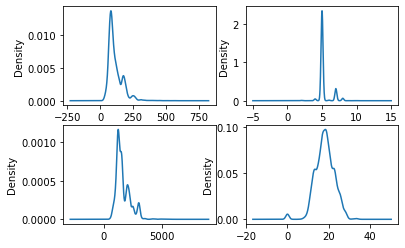

In [17]:
fig = plt.figure()
ax = fig.add_subplot(221)
car_df['Power'].plot(kind='kde', ax=ax)
ax2= fig.add_subplot(222)
car_df['Seats'].plot(kind='kde', ax=ax2)
ax3= fig.add_subplot(223)
car_df['Engine'].plot(kind='kde', ax=ax3)
ax4= fig.add_subplot(224)
car_df['Mileage'].plot(kind='kde', ax=ax4)

In [18]:
'''for features with semantic graph the missing values are filled by mean of the presnt values
whereas for features with sekewed graph the missing values are filled by median of the presnt values'''

'for features with semantic graph the missing values are filled by mean of the presnt values\nwhereas for features with sekewed graph the missing values are filled by median of the presnt values'

In [19]:
car_df['Power']= car_df['Power'].fillna(car_df['Power'].median())
car_df['Engine']= car_df['Engine'].fillna(car_df['Engine'].median())
car_df['Seats']= car_df['Seats'].fillna(car_df['Seats'].mean())
car_df['Mileage']= car_df['Mileage'].fillna(car_df['Mileage'].mean())

In [20]:
car_df.isnull().sum()

Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [21]:
'''for categorical features getting dummies columns so that the features get converted to numrals in which the ML model 
can work'''

'for categorical features getting dummies columns so that the features get converted to numrals in which the ML model \ncan work'

In [22]:
car_df= pd.get_dummies(car_df)
car_df

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,1,0,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,1,0,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,1,0,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,0,1,0,1,1,0,0,0


In [23]:
'''ploting heatmap to visualize the corealtion between features '''

'ploting heatmap to visualize the corealtion between features '

<AxesSubplot:>

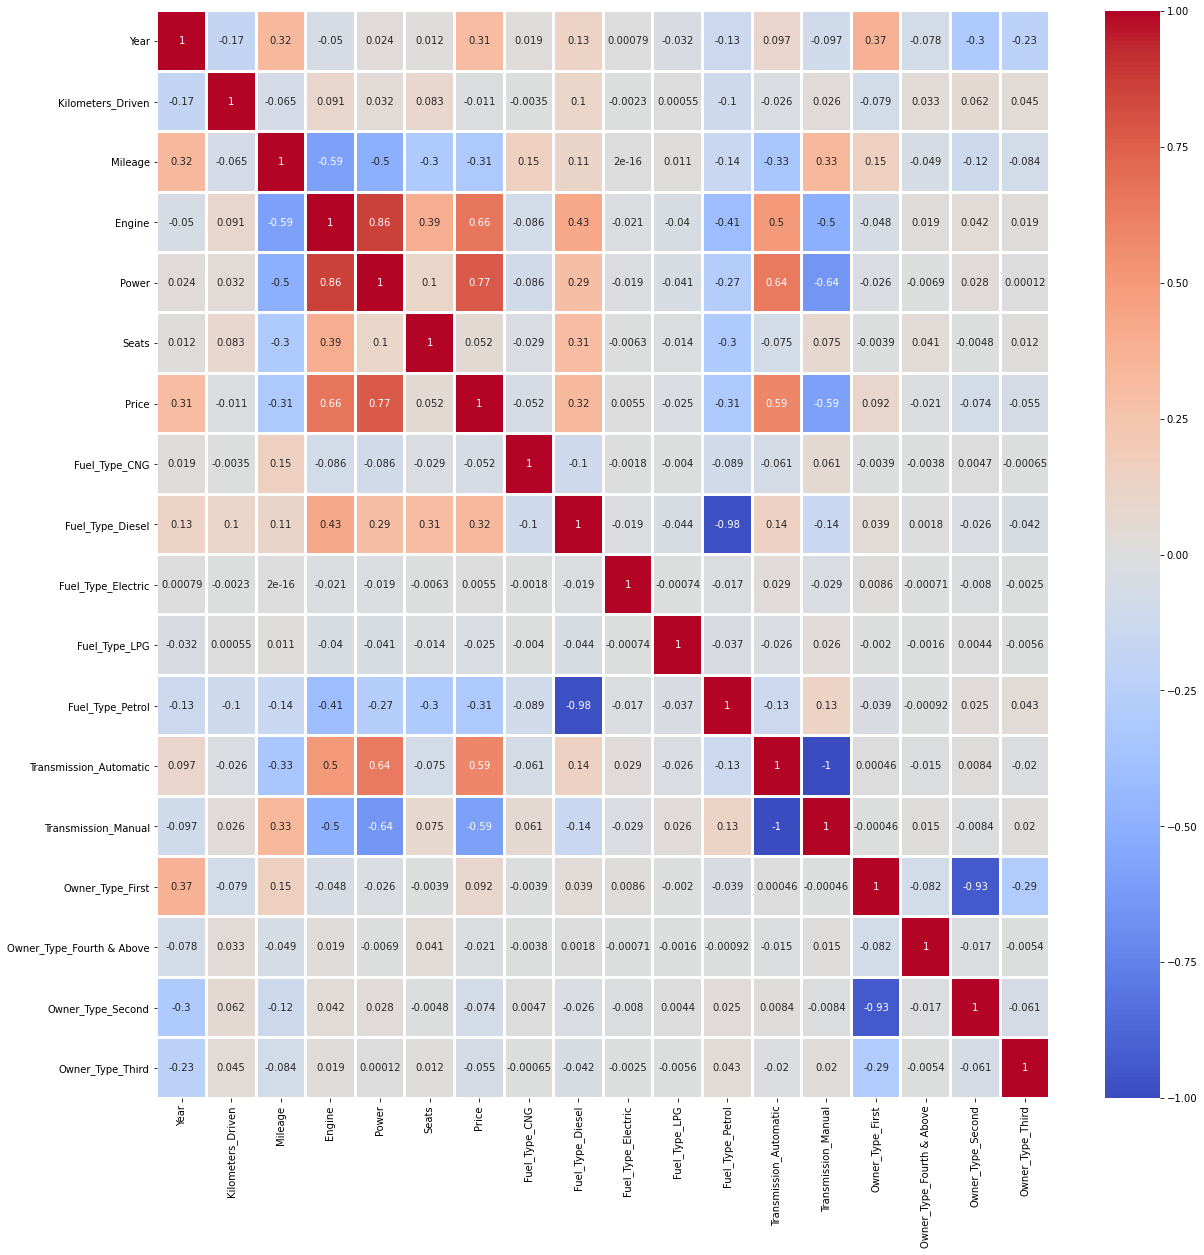

In [42]:
plt.figure(figsize= (20,20))
sns.heatmap(car_df.corr(), annot= True, cmap='coolwarm', linewidths=2)

In [25]:
'''Building Model'''

'Building Model'

In [26]:
x= car_df.drop(['Price'], axis=1)
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1,0,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,0,1,0,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,0,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,0,1,0,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,0,1,0,0,0,1,0,0,0,1,0


In [27]:
y= car_df['Price']
y.head()

0     1.75
1    12.50
2     4.50
3     6.00
4    17.74
Name: Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=5)

In [29]:
'''Scaling the dataset using standardScaler for coping up with the varied measuring units involved in the features'''

'Scaling the dataset using standardScaler for coping up with the varied measuring units involved in the features'

In [30]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_sc= sc.fit_transform(x_train)
x_test_sc= sc.transform(x_test)
x_test_sc

array([[ 0.20037194,  0.25772994,  1.67675156, ..., -0.03532224,
        -0.43393787, -0.13485423],
       [-1.02670711, -0.11936266, -1.16478321, ..., -0.03532224,
         2.30447738, -0.13485423],
       [ 0.81391147, -0.24947397,  2.17729884, ..., -0.03532224,
        -0.43393787, -0.13485423],
       ...,
       [ 0.20037194,  0.44111683,  2.24505852, ..., -0.03532224,
         2.30447738, -0.13485423],
       [-0.41316758, -0.17311865, -0.72106663, ..., -0.03532224,
         2.30447738, -0.13485423],
       [-0.10639782, -0.10481021, -0.2467489 , ..., -0.03532224,
         2.30447738, -0.13485423]])

In [31]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train_sc, y_train)
lr.predict(x_test_sc)
lr.score(x_test_sc, y_test)

0.702176403167905

In [32]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score
svr= SVR()
svr.fit(x_train_sc, y_train)
pred= svr.predict(x_test_sc)
score_train =r2_score(y_test, pred)
score_train

0.7764160160793145

In [33]:
from sklearn.ensemble import RandomForestRegressor
reg =RandomForestRegressor(criterion='mse', max_depth=13, n_estimators=20)
reg.fit(x_train_sc , y_train)
reg.score(x_train_sc, y_train)

0.9795194028835633

In [34]:
'''As RandomForestRegressor shows good accuracy score , selecting the algorithm and applying hyperparameter tuning algorithm
- GridSearchCV to it.'''

'As RandomForestRegressor shows good accuracy score , selecting the algorithm and applying hyperparameter tuning algorithm\n- GridSearchCV to it.'

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth':[11,12,13,14,15], 'n_estimators':[30,50]}
gscv = GridSearchCV(reg, params, cv=5, scoring='neg_mean_squared_log_error')
gscv.fit(x_train_sc, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=13, n_estimators=20),
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'n_estimators': [30, 50]},
             scoring='neg_mean_squared_log_error')

In [36]:
predicted_values = reg.predict(x_test_sc)

In [37]:
predicted_values

array([4.59389447, 7.29782   , 8.10876888, ..., 4.6232713 , 5.72747546,
       3.85646711])

In [40]:
'''Calculating the root-squared-error and mean-squared-error'''

'Calculating the root-squared-error and mean-squared-error'

In [41]:
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(predicted_values, y_test)
RSE= r2_score(predicted_values, y_test)
print(MSE,RSE)

12.313396349381563 0.8830896555707743
